# Exploring a one sample Z-Test

A basic introduction to `imprint`.

In [1]:
from imprint.nb_util import setup_nb

# setup_nb is a handy function for setting up some nice plotting defaults.
setup_nb()
import scipy.stats
import matplotlib.pyplot as plt

import imprint as ip
from imprint.models.ztest import ZTest1D

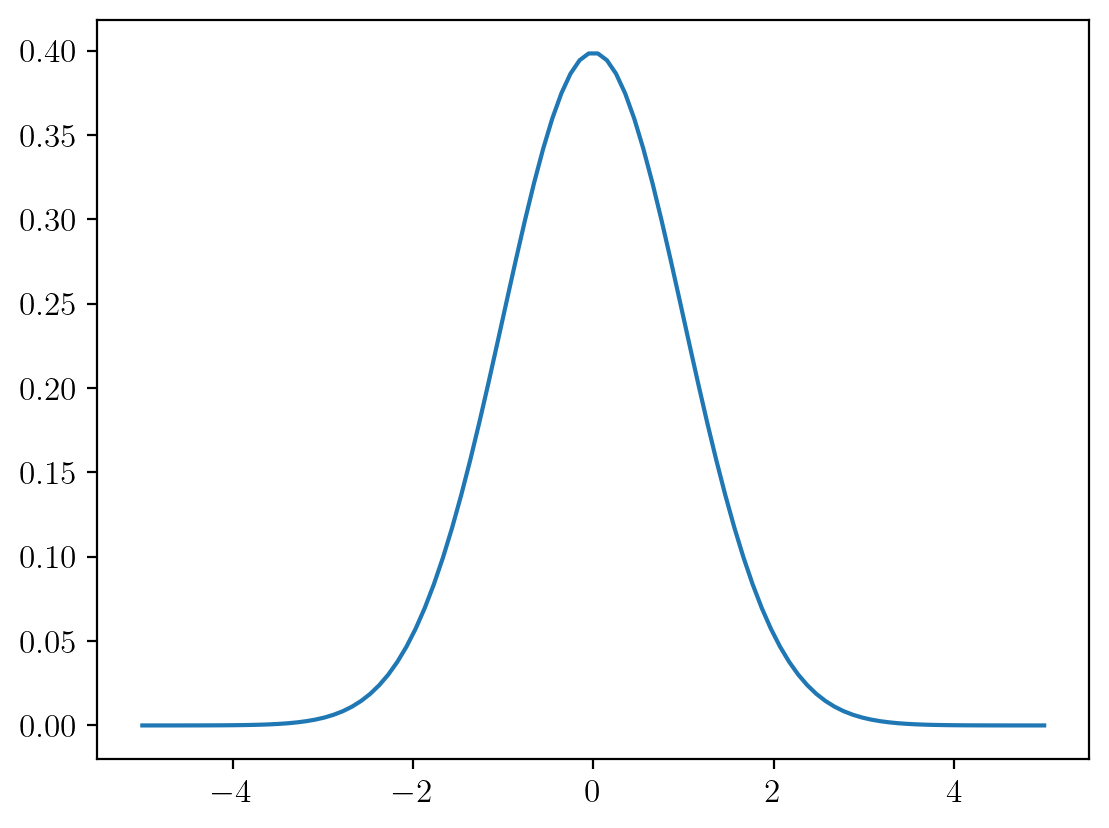

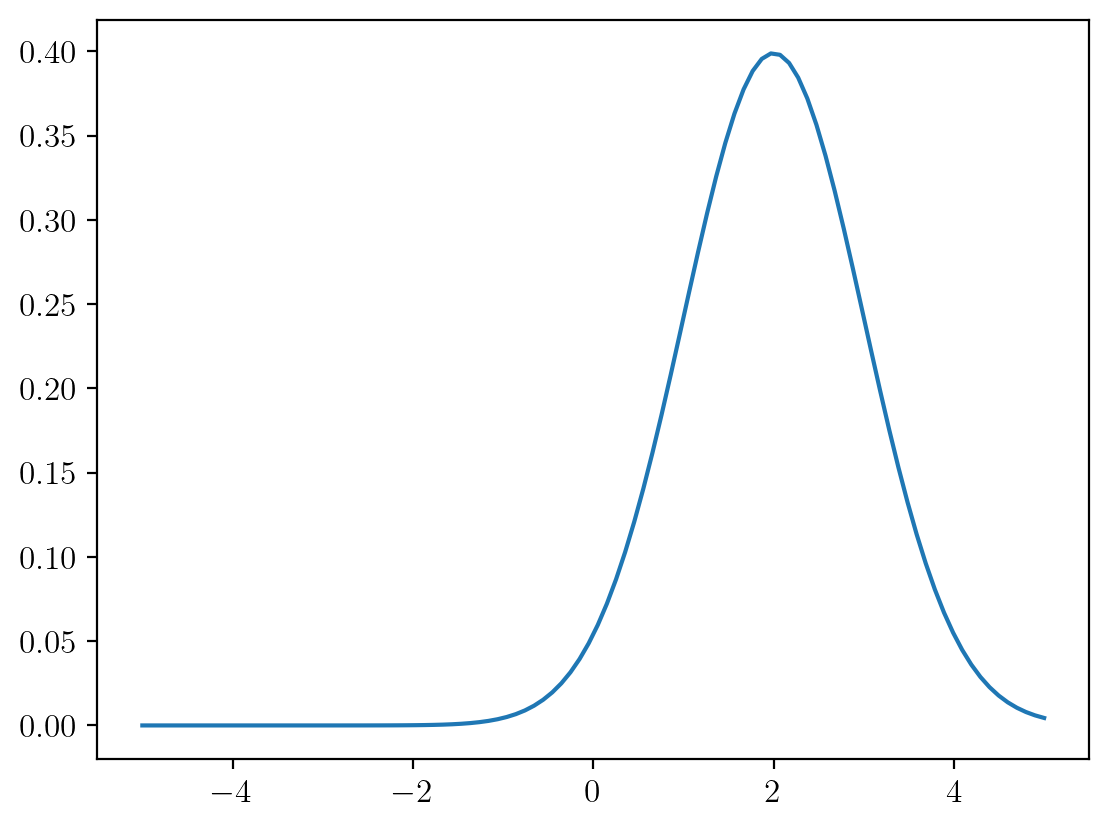

In [35]:
import numpy as np

xs = np.linspace(-5, 5, 100)
pdf = scipy.stats.norm.pdf(xs)
plt.plot(xs, pdf)
plt.show()
pdf = scipy.stats.norm.pdf(xs, loc=2)
plt.plot(xs, pdf)
plt.show()

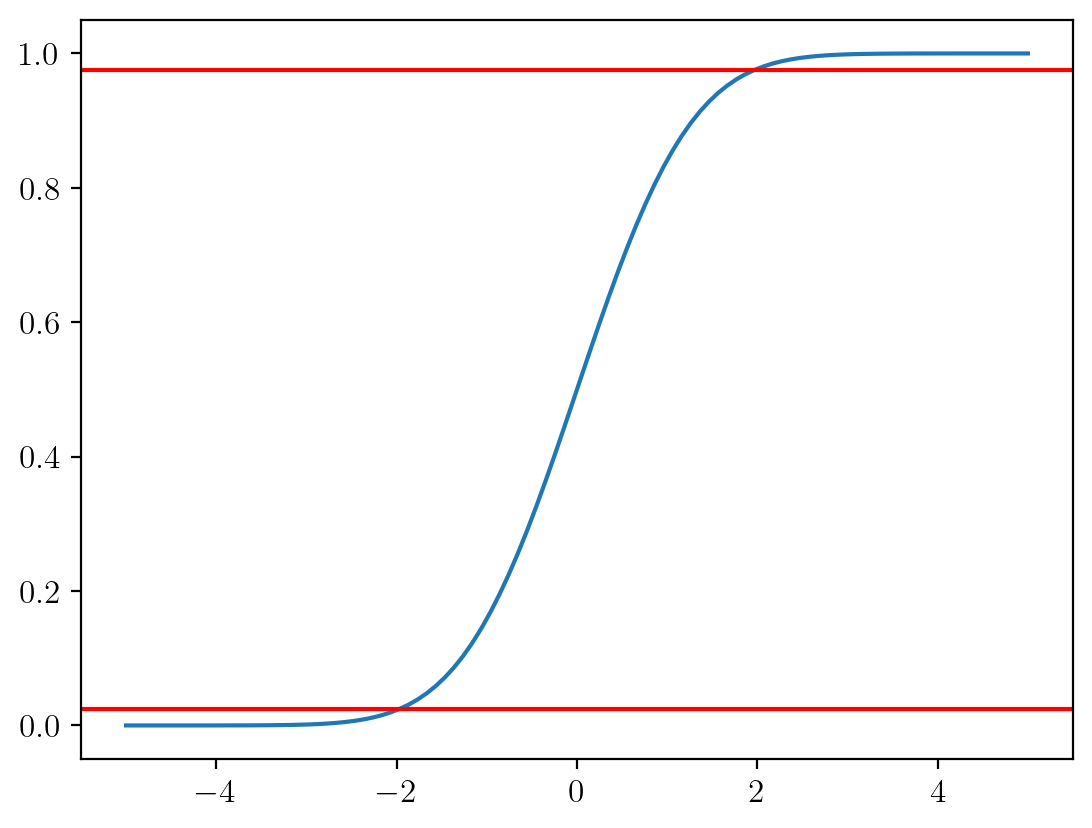

In [5]:
plt.plot(xs, scipy.stats.norm.cdf(xs))
plt.axhline(0.975, color="r")
plt.axhline(0.025, color="r")
plt.show()

In [ ]:
samples = scipy.stats.norm.rvs(loc=true_drug_effect, size=K)

In [13]:
np.sum(samples > 2) / len(samples)

0.0235

In [12]:
1 - scipy.stats.norm.cdf(2)

0.02275013194817921

In [17]:
100 * np.sum(samples > 1.96) / len(samples)

2.57

In [36]:
def apply_statistical_test(true_drug_effect, K=10000):
    samples = scipy.stats.norm.rvs(loc=true_drug_effect, size=K)
    number_of_rejections = np.sum(samples > 1.96)
    positive_rate = number_of_rejections / samples.shape[0]
    return positive_rate

In [41]:
true_effect = np.linspace(-2, 2, 8)
positive_rate = np.array([apply_statistical_test(tf) for tf in true_effect])

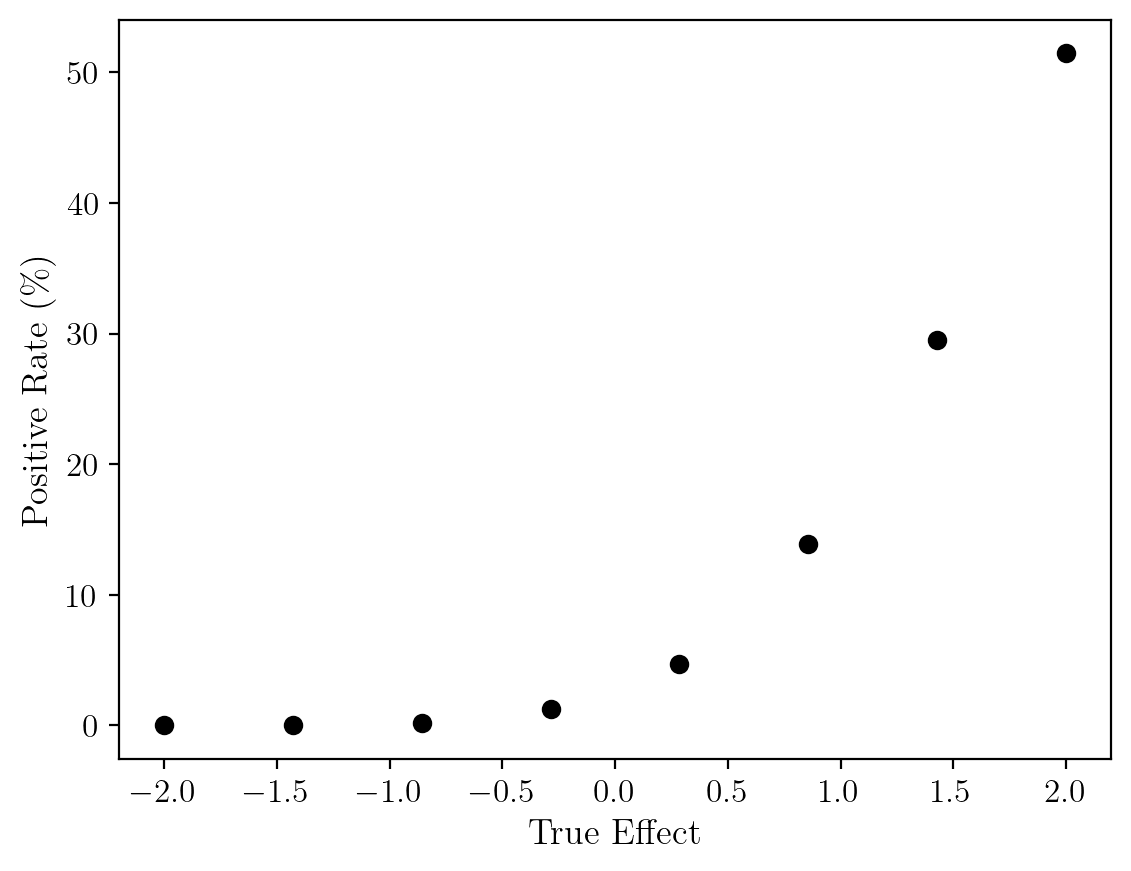

In [42]:
plt.plot(true_effect, 100 * positive_rate, "ko")
plt.ylabel(r"Positive Rate (\%)")
plt.xlabel("True Effect")
plt.show()

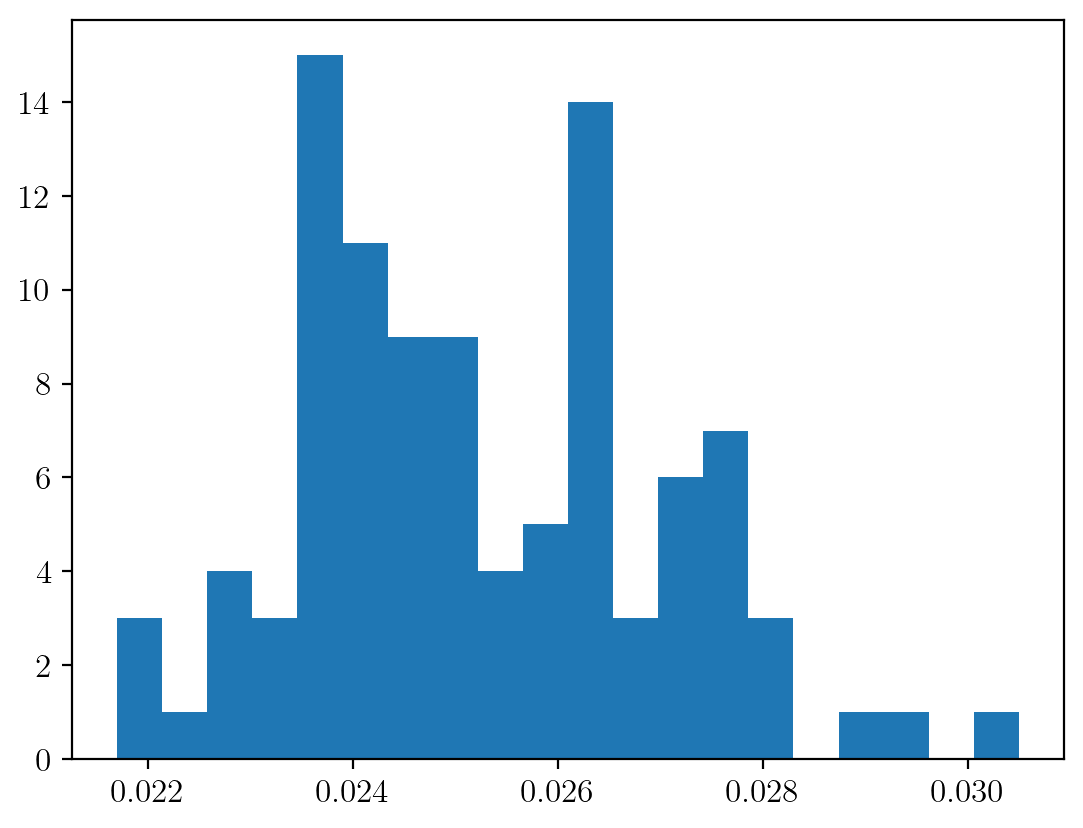

In [40]:
positive_rate = np.array([apply_statistical_test(0) for i in range(100)])
plt.hist(positive_rate, bins=20)
plt.show()

In [43]:
g = ip.cartesian_grid(
    theta_min=[-1], theta_max=[1], n=[100], null_hypos=[ip.hypo("x < 0")]
)
# lam = -1.96 because we negated the statistics so we can do a less than
# comparison.
lam = -1.96
K = 8192
rej_df = ip.validate(ZTest1D, g, lam, K=K)

In [45]:
g.df.head()

,id,active,parent_id,theta0,radii0,null_truth0
0,4189501453469220864,True,0,-0.99,0.01,True
1,4189501453469220865,True,0,-0.97,0.01,True
2,4189501453469220866,True,0,-0.95,0.01,True
3,4189501453469220867,True,0,-0.93,0.01,True
4,4189501453469220868,True,0,-0.91,0.01,True


In [44]:
rej_df.head()

,tie_sum,tie_est,tie_cp_bound,tie_bound
0,11,0.001343,0.002622,0.002713
1,11,0.001343,0.002622,0.002713
2,15,0.001831,0.003262,0.003374
3,15,0.001831,0.003262,0.003374
4,15,0.001831,0.003262,0.003374


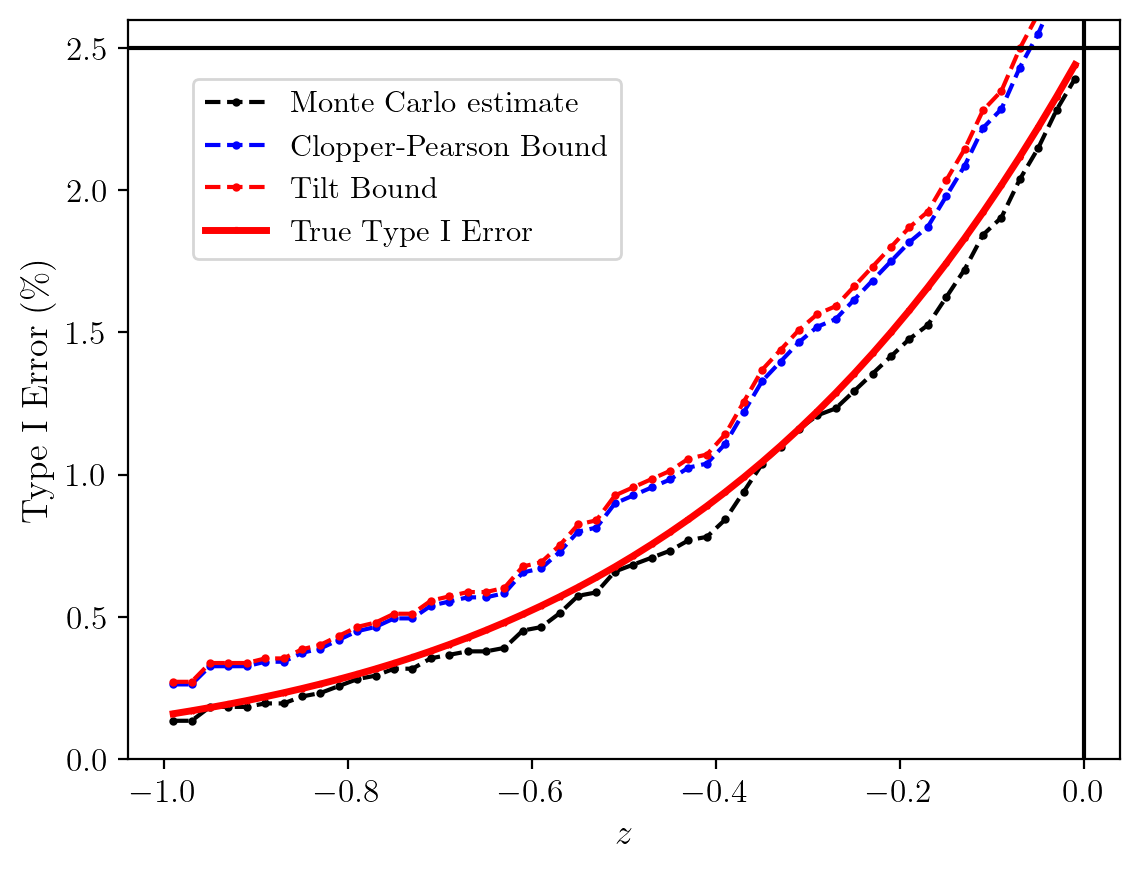

In [9]:
g_rej = g.add_cols(rej_df)
g_rej.df.sort_values("theta0", inplace=True)
true_err = 1 - scipy.stats.norm.cdf(-g_rej.get_theta()[:, 0] - lam)

plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_est"],
    "k--o",
    markersize=2,
    label="Monte Carlo estimate",
)
plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_cp_bound"],
    "b--o",
    markersize=2,
    label="Clopper-Pearson Bound",
)
plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_bound"],
    "r--o",
    markersize=2,
    label="Tilt Bound",
)
plt.plot(
    g_rej.df["theta0"],
    100 * true_err,
    "r-*",
    linewidth=2.5,
    markersize=2,
    label="True Type I Error",
)
plt.axhline(2.5, color="k")
plt.axvline(0, color="k")
plt.ylim([0, 2.6])
plt.legend(fontsize=11, bbox_to_anchor=(0.05, 0.94), loc="upper left")
plt.xlabel("$z$")
_ = plt.ylabel(r"Type I Error (\%)")

inputs:
- the experimental design
- the decision rule
- the number of simulations to run
- the values of the statistical
- validation: the decision rule threshold
- calibration: the goal false positive rate

output:
- validation: the upper bound on false positive rate
- calibration: the tuning parameter value which yield guaranteed goal false positive rate